In [4]:
install.packages("janeaustenr")
install.packages("tidytext")
install.packages("gutenbergr")

Warning message:
"package 'janeaustenr' is in use and will not be installed"also installing the dependencies 'SnowballC', 'hunspell', 'tokenizers'



package 'SnowballC' successfully unpacked and MD5 sums checked
package 'hunspell' successfully unpacked and MD5 sums checked
package 'tokenizers' successfully unpacked and MD5 sums checked
package 'tidytext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpWWaxAU\downloaded_packages


In [5]:
library(dplyr)
library(janeaustenr)
library(tidytext)
book_words <- austen_books() %>%  
  unnest_tokens(word, text) %>%  
  count(book, word, sort = TRUE) %>%  
  ungroup()
total_words <- book_words %>%  
  group_by(book) %>%  
  summarize(total = sum(n))
book_words <- left_join(book_words, total_words)

book_words

## n: num of times word is used
## total: total number of words

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"Joining, by = "book"


book,word,n,total
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996
Mansfield Park,of,4778,160460
Pride & Prejudice,the,4331,122204
Emma,of,4291,160996
Pride & Prejudice,to,4162,122204


Warning message:
"package 'ggplot2' was built under R version 3.4.4"`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 896 rows containing non-finite values (stat_bin)."

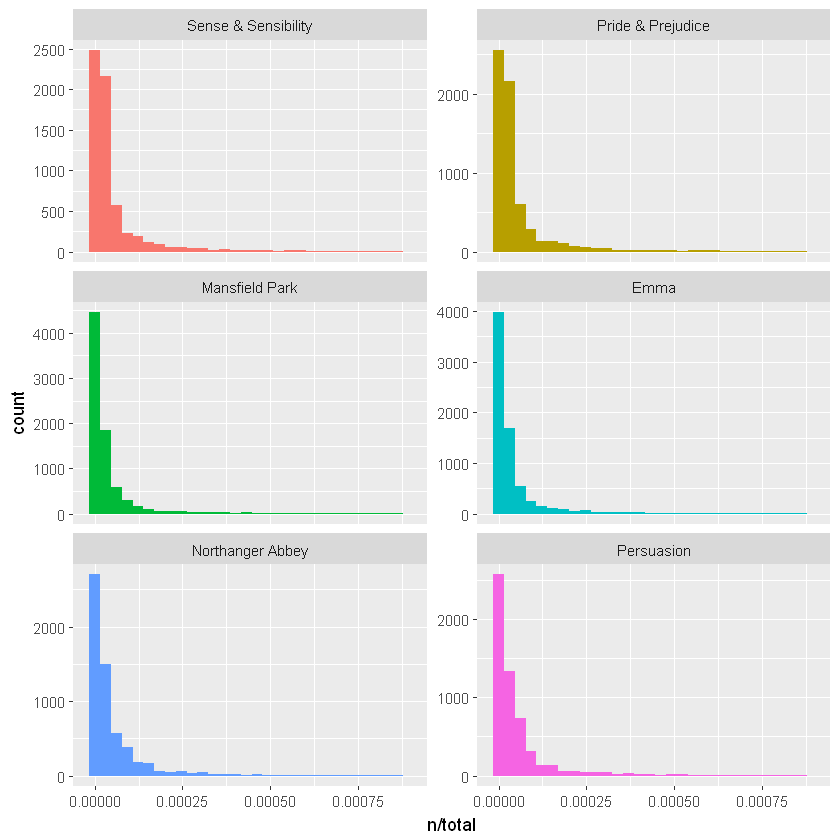

In [6]:
library(ggplot2)

ggplot(book_words, aes(n/total, fill = book)) +
  geom_histogram(show.legend = FALSE) +
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y")

#### Conclusion

**1.** Plots exhibit **_similar distributions for all the novels_**, with many words that occur rarely and fewer words that occur frequently

**2.** Long tails to the right for these novels 

**Question** is this unique for Jane Austenr novel or something seen in general ???


Distributions like these are typical in language. In fact, those types of long-tailed distributions are so common in any given corpus of natural language hat the relationship between the frequency that a word is used and its rank has been the subject of study. 

What is the result of study ???

frequency that a word appears is inversely proportional to its rank

In [11]:
freq_by_rank <- book_words %>%
  group_by(book) %>%
  mutate(rank = row_number(),
         `term frequency` = n/total)

#freq_by_rank

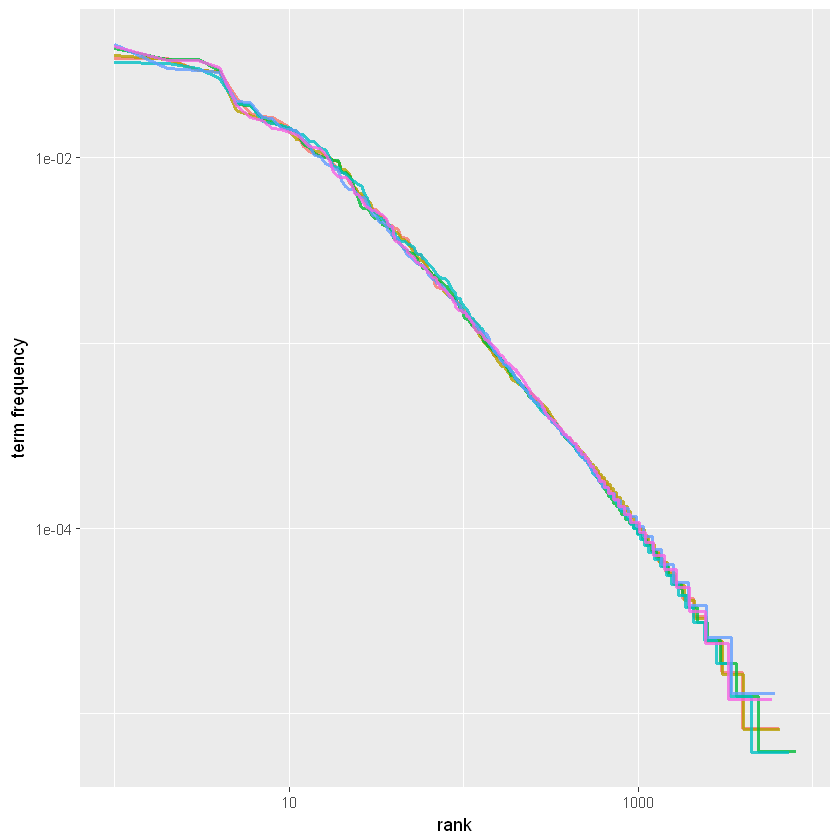

In [8]:
freq_by_rank %>%
  ggplot(aes(rank, `term frequency`, color = book)) +
  geom_line(size = 1.1, alpha = 0.8, show.legend = FALSE) +
  scale_x_log10() +
  scale_y_log10()

###### This is a BIG problem... If we believe the analysis then  all Jean Auestern novels should be more or less similar !!!! is it so ??? 

###### infect all of the novels would have similar distribution 

###### what can we do ????

## TfIdf

In [12]:
book_words <- book_words %>%
  bind_tf_idf(word, book, n)
book_words

book,word,n,total,tf,idf,tf_idf
Mansfield Park,the,6206,160460,0.03867631,0,0
Mansfield Park,to,5475,160460,0.03412065,0,0
Mansfield Park,and,5438,160460,0.03389007,0,0
Emma,to,5239,160996,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0,0
Mansfield Park,of,4778,160460,0.02977689,0,0
Pride & Prejudice,the,4331,122204,0.03544074,0,0
Emma,of,4291,160996,0.02665284,0,0
Pride & Prejudice,to,4162,122204,0.03405780,0,0


In [13]:
book_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

book,word,n,tf,idf,tf_idf
Sense & Sensibility,elinor,623,0.005193528,1.7917595,0.009305552
Sense & Sensibility,marianne,492,0.004101470,1.7917595,0.007348847
Mansfield Park,crawford,493,0.003072417,1.7917595,0.005505032
Pride & Prejudice,darcy,373,0.003052273,1.7917595,0.005468939
Persuasion,elliot,254,0.003036171,1.7917595,0.005440088
Emma,emma,786,0.004882109,1.0986123,0.005363545
Northanger Abbey,tilney,196,0.002519928,1.7917595,0.004515105
Emma,weston,389,0.002416209,1.7917595,0.004329266
Pride & Prejudice,bennet,294,0.002405813,1.7917595,0.004310639
Persuasion,wentworth,191,0.002283105,1.7917595,0.004090775


Selecting by tf_idf


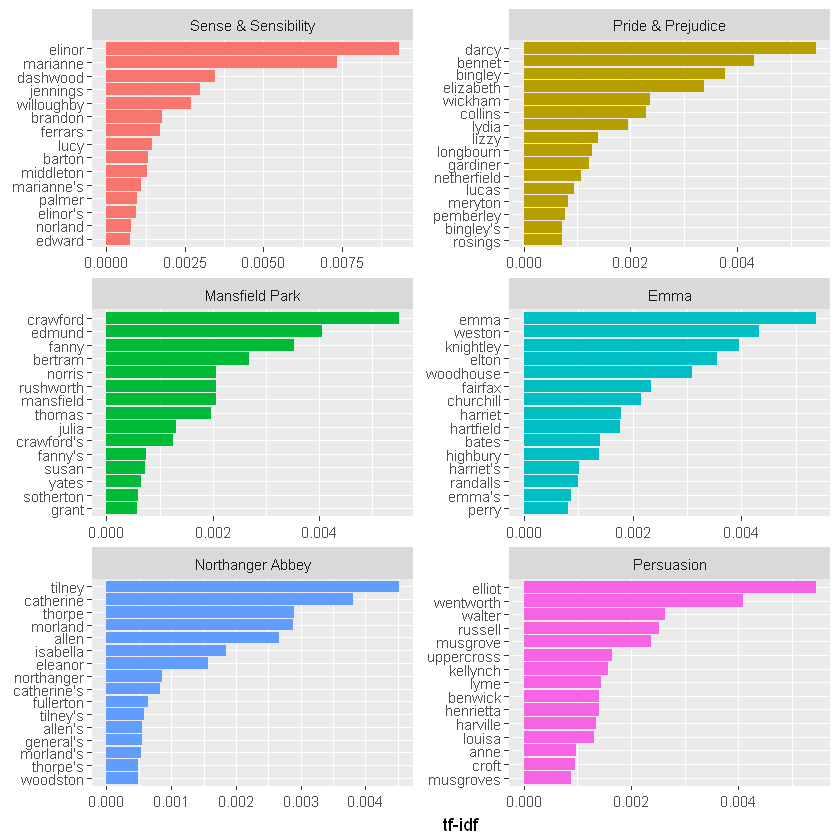

In [14]:
book_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(book) %>%
  top_n(15) %>%
  ungroup %>%
  ggplot(aes(word, tf_idf, fill = book)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~book, ncol = 2, scales = "free") +
  coord_flip()

#### How about Physics corpora

In [17]:
library(gutenbergr)
physics <- gutenberg_download(c(37729, 14725, 13476, 5001),
                              meta_fields = "author")

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
`curl` package not installed, falling back to using `url()`
Using mirror http://aleph.gutenberg.org


In [18]:
physics_words <- physics %>%
  unnest_tokens(word, text) %>%
  count(author, word, sort = TRUE) %>%
  ungroup()

physics_words

author,word,n
"Galilei, Galileo",the,3760
"Tesla, Nikola",the,3604
"Huygens, Christiaan",the,3553
"Einstein, Albert",the,2994
"Galilei, Galileo",of,2049
"Einstein, Albert",of,2030
"Tesla, Nikola",of,1737
"Huygens, Christiaan",of,1708
"Huygens, Christiaan",to,1207
"Tesla, Nikola",a,1176


###### Even Physics Journals seems to look like Jean Austern novels 

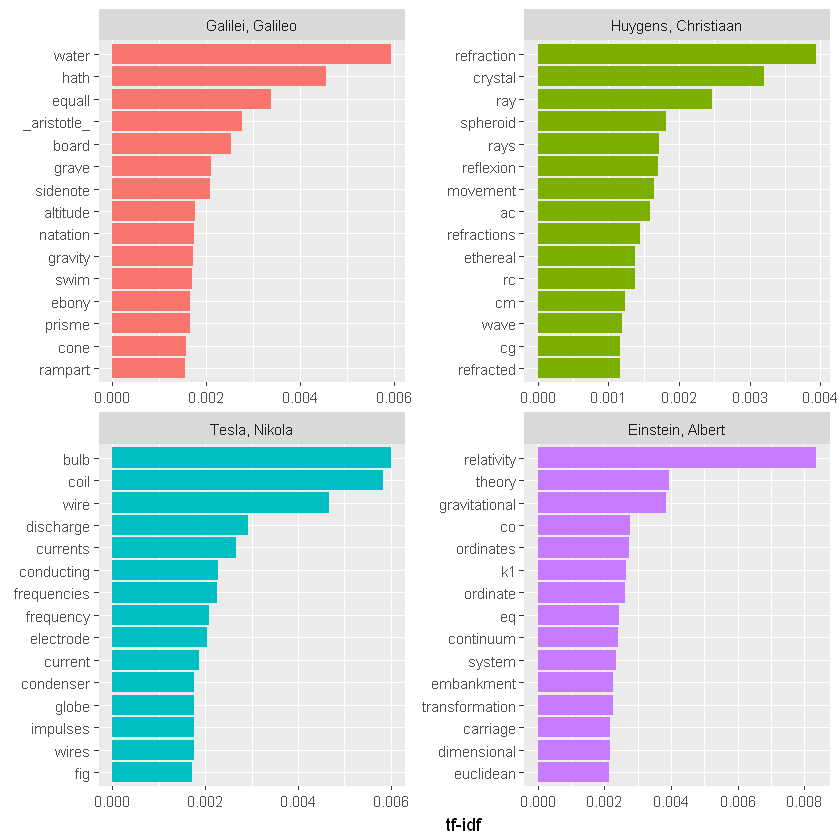

In [19]:
plot_physics <- physics_words %>%
  bind_tf_idf(word, author, n) %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan",
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

plot_physics %>%
  group_by(author) %>%
  top_n(15, tf_idf) %>%
  ungroup() %>%
  mutate(word = reorder(word, tf_idf)) %>%
  ggplot(aes(word, tf_idf, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip()

##### A much better result -- this looks like more of Physics terminology.... 

Einstein text has eq as an imp word.. Was Einstein more analytical than rest ??

In [20]:
library(stringr)

physics %>%
  filter(str_detect(text, "eq\\.")) %>%
  select(text)

text
eq. 1: file eq01.gif
eq. 2: file eq02.gif
eq. 3: file eq03.gif
eq. 4: file eq04.gif
eq. 05a: file eq05a.gif
eq. 05b: file eq05b.gif
the distance between the points being eq. 06 .
direction of its length with a velocity v is eq. 06 of a metre.
"velocity v=c we should have eq. 06a ,"
the rod as judged from K1 would have been eq. 06 ;


###### Enistein definetely loved writing equation..

What about **K1**

In [21]:
physics %>%
  filter(str_detect(text, "K1")) %>%
  select(text)

text
to a second co-ordinate system K1 provided that the latter is
condition of uniform motion of translation. Relative to K1 the
"tenet thus: If, relative to K, K1 is a uniformly moving co-ordinate"
with respect to K1 according to exactly the same general laws as with
"does not hold, then the Galileian co-ordinate systems K, K1, K2, etc.,"
"Relative to K1, the same event would be fixed in respect of space and"
"to K1, when the magnitudes x, y, z, t, of the same event with respect"
of light (and of course for every ray) with respect to K and K1. For
reference-body K and for the reference-body K1. A light-signal is sent
"immediately follows. If referred to the system K1, the propagation of"


##### more cleanup and processing...

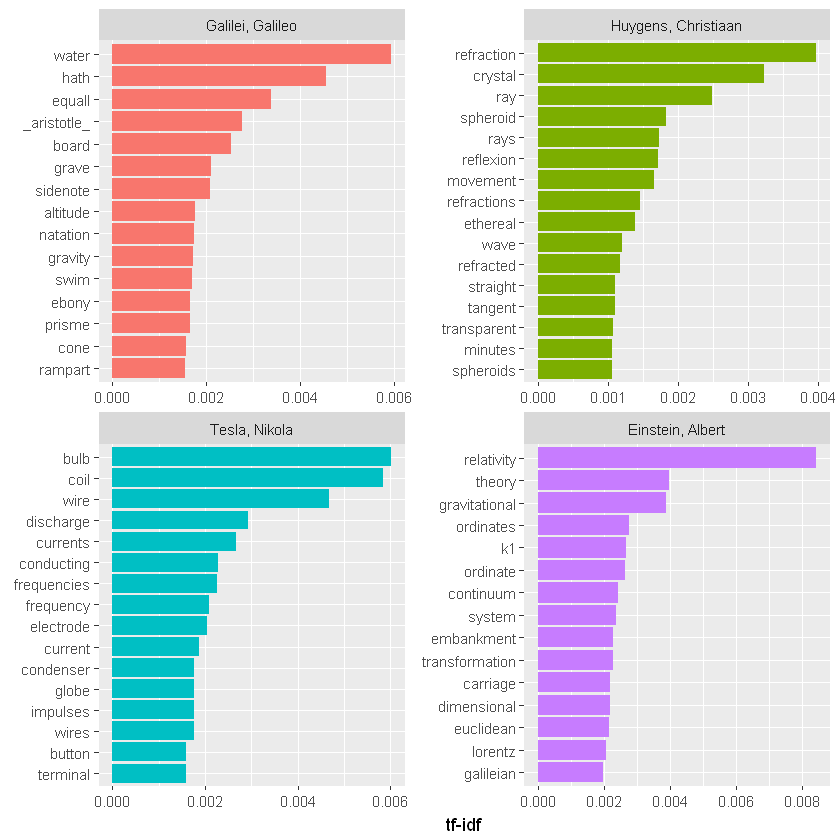

In [22]:
mystopwords <- data_frame(word = c("eq", "co", "rc", "ac", "ak", "bn",
                                   "fig", "file", "cg", "cb", "cm"))
physics_words <- anti_join(physics_words, mystopwords, by = "word")
plot_physics <- physics_words %>%
  bind_tf_idf(word, author, n) %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(author) %>%
  top_n(15, tf_idf) %>%
  ungroup %>%
  mutate(author = factor(author, levels = c("Galilei, Galileo",
                                            "Huygens, Christiaan",
                                            "Tesla, Nikola",
                                            "Einstein, Albert")))

ggplot(plot_physics, aes(word, tf_idf, fill = author)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~author, ncol = 2, scales = "free") +
  coord_flip()